In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [3]:
from sklearn.metrics import *
from sklearn.model_selection import *

In [35]:
df = pd.read_csv('train_dec08_task3.csv') #讀入訓練資料
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,class
0,7.172849,8.368236,5.060625,9.193188,6.179376,10.539020,10.253188,5.757787,7.093782,11.982133,0.142851,2.466842,5.538548,6.676509,A
1,4.191168,5.897300,4.087733,9.018442,8.246369,9.351617,7.841548,9.185678,10.275072,3.374108,4.158709,4.094037,5.944785,5.446690,A
2,5.345508,5.168657,5.975201,5.646929,12.913498,7.377864,4.754143,5.221510,9.673443,10.226155,5.771919,5.095369,4.272498,6.992482,A
3,8.284880,7.280406,6.371599,5.113472,12.724496,12.548256,6.277546,1.745729,4.377580,3.202658,2.271156,3.561469,5.116181,6.809364,A
4,5.246311,7.267519,4.256374,8.625228,15.476709,6.928250,11.210572,4.053110,7.017755,2.530820,3.627361,6.074664,4.488416,5.356890,A


In [36]:
df.shape

(6500, 15)

In [37]:
y = df['class'] #訓練資料的分類結果
X = df.drop('class', axis = 1) #X中留下features
X.shape

(6500, 14)

C    2500
B    2000
A    1000
D    1000
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

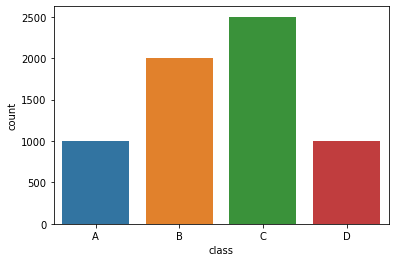

In [38]:
#查看三種分類分別的數量(這裡會發現資料imbalance)
print(y.value_counts())
sns.countplot(x = y)

2    2500
1    2000
0    1000
3    1000
Name: class, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21832\503688296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[0:1000] = 0
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21832\503688296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[1000:3000] = 1
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21832\503688296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[3000:5500] = 2
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21832\503688296

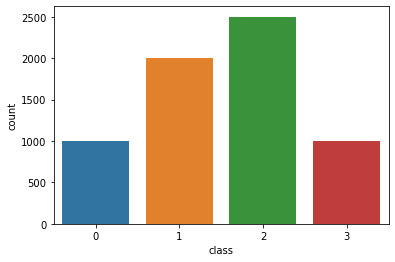

In [39]:
y[0:1000] = 0
y[1000:3000] = 1
y[3000:5500] = 2
y[5500:6500] = 3
print(y.value_counts())
sns.countplot(x = y)
y = y.astype('int64')

In [40]:
#用上採樣(OverSampling)處理imbalance資料
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)
X.shape

(10000, 14)

0    2500
1    2500
2    2500
3    2500
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

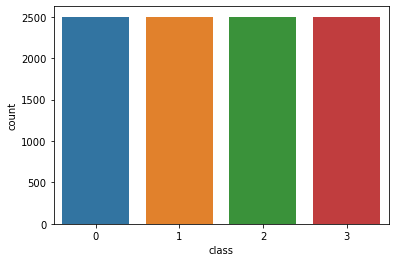

In [41]:
#確認三個分類在上採樣後確實資料數量一致
print(y.value_counts())
sns.countplot(x = y)

In [42]:
# 將只有10個features的資料分割成0.85訓練、0.15測試
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.85, test_size=0.15)

In [45]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X1, y1)
# 使用訓練資料預測分類
predicted1 = xgboostModel.predict(X2)

print(accuracy_score(y2, predicted1))
print(xgboostModel.feature_importances_)


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:14:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8606666666666667
[0.05084631 0.03792282 0.17008935 0.20422463 0.12117885 0.13367169
 0.08028346 0.02935114 0.02962214 0.02799234 0.03069042 0.028413
 0.02730431 0.02840954]


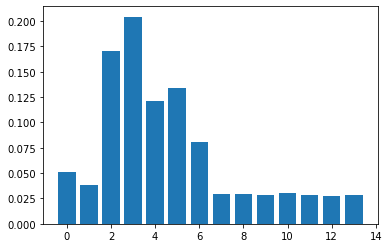

In [46]:
plt.bar(range(len(xgboostModel.feature_importances_)), xgboostModel.feature_importances_)
plt.show()

In [51]:
#讀入測試資料並且只挑選前10名的features
df_test = pd.read_csv('test_dec08_task3_only_features.csv')
X_features = X[['feature3', 'feature2', 'feature5', 'feature4', 'feature6', 'feature0', 'feature1', 'feature10', 'feature8', 'feature7']]
test_features = df_test[['feature3', 'feature2', 'feature5', 'feature4', 'feature6', 'feature0', 'feature1', 'feature10', 'feature8', 'feature7']]

In [52]:
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_features, y)
# 使用訓練資料預測分類
predicted_final = xgboostModel.predict(test_features)

print(predicted_final)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:18:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[3 1 1 ... 2 0 2]


In [53]:
import csv

In [54]:
with open('output_1216_3.csv', 'w', newline='') as csvfile:
  
    writer = csv.writer(csvfile)

    writer.writerow(['Id', 'Category'])

    for i in range(len(predicted_final)):
        if predicted_final[i] == 0:
            writer.writerow([i + 1, 'A'])
        elif predicted_final[i] == 1:
            writer.writerow([i + 1, 'B'])
        elif predicted_final[i] == 2:
            writer.writerow([i + 1, 'C'])
        elif predicted_final[i] == 3:
            writer.writerow([i + 1, 'D'])